In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

After building a model that predicts whether an email is a span or ham based on the words in the email, I wonder if it is possible to predict genre of music based on words in lyrics. My initial thoughts on the prediction are while it may be possible to predict distinguishable genres such as hiphop vs blues that do not have common characteristics in music, it would not be easy to predict between hiphop vs pop since many words are used in hiphop and pop. In this project, I am going to build two model: a model that predicts if a song is hiphop or blues and a model that predicts if a song is hiphop or pop. 

# Importing Data Set

Narrowing down to musics that are hip hop and blues.

In [49]:
music = pd.read_csv('musicdata.csv')
genre = ['hiphop', 'blues']
music_first = music[(music['genre'] == 'hip hop') | (music['genre'] == 'blues')]

In [50]:
music_first.head(5)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics
333,53802,thee oh sees,overthrown,2018,blues,murder slay suck disease point flee bleed fuck...
334,53803,buddy guy,you did the crime,2018,blues,lie cheat girl excuse criminal behavior lose c...
335,53804,the wood brothers,one drop of truth,2018,blues,lonely lock cell bunch nice people know cold c...
336,53805,black rebel motorcycle club,echo,2018,blues,maybe little drown desire time smile heavens s...
337,53806,ty segall,body behavior,2018,blues,pick sewer train future come inside inside dee...


In [51]:
music_first.shape

(428, 6)

In [52]:
music_first['genre'].value_counts()

hip hop    224
blues      204
Name: genre, dtype: int64

In [53]:
music_first.isnull().sum()

Unnamed: 0      0
artist_name     0
track_name      0
release_date    0
genre           0
lyrics          0
dtype: int64

There is no missing values in the data. <br> Now, spliting data into train and test

In [54]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(music_first, test_size = 0.15)

In [55]:
train['genre'].value_counts()

hip hop    196
blues      167
Name: genre, dtype: int64

In [56]:
train.head(5)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics
527,54280,santana,blue skies,2019,blues,lose feet grind color burn loneliness ocean aw...
471,54135,robert randolph & the family band,have mercy,2019,blues,want look shed skin afford shoot watch feel st...
1170,82430,t-pain,look at her go (feat. chris brown),2019,hip hop,boom come baby boom come baby boom come baby c...
1135,82383,lil' flip,hop out (feat. senistar),2019,hip hop,bruh imagine maxxkii slump bullets melt intact...
1105,82345,gang starr,jazz thing,2019,hip hop,feat branford marsalis instrumentally like pla...


One example of lyrics

In [57]:
train.iloc[0, 5]

'lose feet grind color burn loneliness ocean away fear burn loneliness ocean away fear send blue sky light rain remember smile mama think eye grandma feel lose know belong tear roll better blue sky memories magical shine moonlight remind mystical moments remember night cross line need blue forget pain blue heart blue surround want blue tear blue eye doubt miamafrican send blue sky blue sky blue sky blue sky send blue sky cause destiny hate company blue send wish open sky away blue strong hold blue sky hold say blue sky hold blue sky blue sky'

# EDA

I want to see how many times each word shows up not just in a song's lyrics, but in all songs that fall into the same genre. I am going to use data dictionary where its key becomes words and value is # of times that each word used in the genre.

In [58]:
def dd_creation(x):
    dictionary = {}
    for i in x:
        string = i
        res = string.split()
        for j in res:
            if j not in dictionary.keys():
                dictionary[j] = 1
            else:
                dictionary[j] = dictionary[j] + 1
                
    return dictionary
            
            

In [59]:
hiphop_train = dd_creation(train[train['genre'] == 'hip hop']['lyrics'])
blues_train = dd_creation(train[train['genre'] == 'blues']['lyrics'])

In [60]:
total_hiphop_word_count = sum(hiphop_train.values())
total_blues_word_count = sum(blues_train.values())
total_hiphop_word_count, total_blues_word_count

(19191, 12019)

Sorting the dictionary based on the # of times in descending order.

In [61]:
hiphop_train = dict(sorted(hiphop_train.items(), key = lambda item: item[1], reverse = True))
blues_train = dict(sorted(blues_train.items(), key = lambda item: item[1], reverse = True))

In [62]:
hiphop_train

{'like': 466,
 'know': 268,
 'nigga': 242,
 'shit': 208,
 'bitch': 197,
 'niggas': 194,
 'fuck': 191,
 'cause': 182,
 'come': 172,
 'lyric': 150,
 'commercial': 146,
 'yeah': 144,
 'wanna': 108,
 'tell': 108,
 'time': 102,
 'want': 97,
 'real': 94,
 'right': 89,
 'talk': 83,
 'think': 82,
 'head': 81,
 'go': 69,
 'feel': 68,
 'game': 68,
 'black': 66,
 'hear': 65,
 'leave': 65,
 'baby': 64,
 'look': 64,
 'money': 64,
 'need': 63,
 'girl': 62,
 'good': 62,
 'better': 62,
 'life': 61,
 'smoke': 60,
 'drink': 60,
 'play': 59,
 'drop': 57,
 'bout': 56,
 'gettin': 53,
 'fuckin': 52,
 'turn': 51,
 'niggaz': 51,
 'live': 50,
 'beat': 48,
 'stop': 44,
 'mind': 43,
 'hard': 42,
 'gotta': 42,
 'rhyme': 42,
 'light': 41,
 'check': 41,
 'block': 40,
 'little': 40,
 'roll': 40,
 'world': 40,
 'say': 39,
 'kick': 39,
 'start': 39,
 'damn': 38,
 'body': 38,
 'gonna': 38,
 'somethin': 38,
 'hoe': 37,
 'face': 37,
 'hold': 37,
 'wild': 37,
 'thing': 36,
 'blow': 35,
 'comin': 35,
 'style': 35,
 'straig

In [63]:
blues_train

{'come': 225,
 'time': 212,
 'know': 162,
 'yeah': 149,
 'like': 120,
 'long': 120,
 'want': 115,
 'away': 111,
 'leave': 108,
 'baby': 91,
 'cause': 88,
 'right': 87,
 'fall': 86,
 'night': 83,
 'feel': 80,
 'hold': 79,
 'live': 77,
 'gonna': 76,
 'home': 75,
 'look': 69,
 'world': 68,
 'turn': 67,
 'stay': 66,
 'black': 65,
 'break': 63,
 'heart': 62,
 'go': 61,
 'blue': 59,
 'eye': 59,
 'life': 58,
 'think': 56,
 'wanna': 56,
 'hand': 54,
 'bring': 53,
 'believe': 53,
 'need': 50,
 'evil': 50,
 'tell': 49,
 'lose': 47,
 'kill': 47,
 'wall': 46,
 'good': 46,
 'sleep': 46,
 'call': 45,
 'heavy': 45,
 'holy': 45,
 'light': 44,
 'hard': 43,
 'devil': 43,
 'pain': 42,
 'change': 42,
 'damn': 42,
 'mind': 42,
 'walk': 42,
 'free': 41,
 'sing': 41,
 'bother': 41,
 'burn': 40,
 'take': 38,
 'lord': 37,
 'hear': 37,
 'run': 36,
 'shake': 36,
 'past': 36,
 'gotta': 35,
 'woah': 35,
 'darkness': 35,
 'head': 34,
 'try': 34,
 'play': 34,
 'fear': 33,
 'learn': 33,
 'shit': 33,
 'watch': 32,
 'e

List of all word used in both hiphop and blues.

In [64]:
list_of_words = []
def list_creation(x):
    for i in x:
        if i not in list_of_words:
            if i.isalpha():
                list_of_words.append(i)
            
list_creation(hiphop_train)
list_creation(blues_train)

In [65]:
list_of_words

['like',
 'know',
 'nigga',
 'shit',
 'bitch',
 'niggas',
 'fuck',
 'cause',
 'come',
 'lyric',
 'commercial',
 'yeah',
 'wanna',
 'tell',
 'time',
 'want',
 'real',
 'right',
 'talk',
 'think',
 'head',
 'go',
 'feel',
 'game',
 'black',
 'hear',
 'leave',
 'baby',
 'look',
 'money',
 'need',
 'girl',
 'good',
 'better',
 'life',
 'smoke',
 'drink',
 'play',
 'drop',
 'bout',
 'gettin',
 'fuckin',
 'turn',
 'niggaz',
 'live',
 'beat',
 'stop',
 'mind',
 'hard',
 'gotta',
 'rhyme',
 'light',
 'check',
 'block',
 'little',
 'roll',
 'world',
 'say',
 'kick',
 'start',
 'damn',
 'body',
 'gonna',
 'somethin',
 'hoe',
 'face',
 'hold',
 'wild',
 'thing',
 'blow',
 'comin',
 'style',
 'straight',
 'try',
 'bring',
 'weed',
 'word',
 'grow',
 'tryna',
 'watch',
 'people',
 'lookin',
 'high',
 'stick',
 'young',
 'take',
 'pull',
 'stay',
 'walk',
 'bust',
 'bang',
 'chain',
 'break',
 'flow',
 'party',
 'girls',
 'catch',
 'street',
 'listen',
 'step',
 'hell',
 'shake',
 'hand',
 'work',
 

Since the total number of words used in hip hop and blues are different, it is not okay just to use the number of times each word used in hip hop and blues. Instead, I decided to use frequency by dividing the number by the total number words in hiphop and blues.

In [66]:
# These are the words that I chose to distinguish the genres.
words = ['like', 'time', 'nigga', 'shit','believe', 'money', 'smoke', 'lyric', 'bitch', 'away', 'leave', 'long', 'right', 
         'cause', 'night', 'change']

def df_creating(x):
    df = pd.DataFrame({'word' : x})
    fre_in_hiphop = []
    fre_in_blues = []
    for i in x:
        #hiphop
        fre_in_hiphop.append(hiphop_train[i] / total_hiphop_word_count)
        #blues
        fre_in_blues.append(blues_train[i] / total_blues_word_count)
        
    df['hiphop'] = fre_in_hiphop
    df['blues'] = fre_in_blues
    
    return df

Putting in a data frame for readability.

In [67]:
demo = df_creating(words)
demo

,word,hiphop,blues
0,like,0.024282,0.009984
1,time,0.005315,0.017639
2,nigga,0.012610,0.000250
3,shit,0.010838,0.002746
4,believe,0.000834,0.004410
5,money,0.003335,0.002579
6,smoke,0.003126,0.000416
7,lyric,0.007816,0.000250
8,bitch,0.010265,0.001165
9,away,0.000886,0.009235


Bar Plot that shows the frequencies of the chosen words.

Text(0, 0.5, 'frequency')

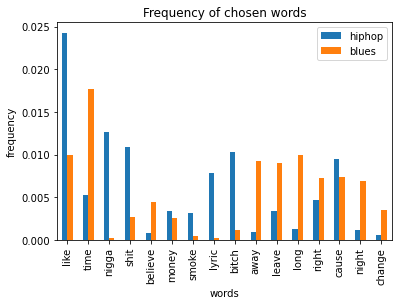

In [68]:
demo.plot(kind = 'bar', x = 'word')
plt.title("Frequency of chosen words")
plt.xlabel('words')
plt.ylabel('frequency')

Below function returns a matrix if the chosen words were used in lyrics. For example, if the word 'like' was used in a lyrics, it returns 1 and 0 if not.

In [69]:
def words_in_texts(words, texts):
    
    indicator_array = [[1 if i in texts.iloc[j] else 0 for i in words] for j in np.arange(len(texts))]
    return indicator_array

In [70]:
my_array = words_in_texts(words, train['lyrics'])

# Building A Model.

In [71]:
X_train = np.array(words_in_texts(words, train['lyrics']))
Y_train = train['genre']

X_train[:5], Y_train[:5]

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]]),
 527       blues
 471       blues
 1170    hip hop
 1135    hip hop
 1105    hip hop
 Name: genre, dtype: object)

In [72]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)

training_accuracy = np.mean(model.predict(X_train) == Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.953168044077135


Achieved 95% of Accuracy!

In [77]:
train['predicted'] = model.predict(X_train)

/tmp/ipykernel_25/600859466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['predicted'] = model.predict(X_train)


Applying Model to the test set!

In [78]:
test_matrix = words_in_texts(words, test['lyrics'])

test['predcted'] = model.predict(test_matrix)
test

/tmp/ipykernel_25/4206294194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predcted'] = model.predict(test_matrix)


,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,predcted
999,82173,hiphop tamizha,vaadi nee vaa,2018,hip hop,couldn stand weather know rain thunder hill va...,blues
443,54055,eric gales,whatcha gon' do,2018,blues,time wonder laugh sleep dust see culture fade ...,blues
1093,82322,nappy roots,"dime, quarter, nickel, penny",2019,hip hop,break dollar gutter south dime quarter nickel ...,hip hop
1015,82198,q-tip,won't trade,2018,hip hop,know epitaph niggers laugh trick gas siphon ca...,hip hop
457,54098,thee oh sees,sentient oona,2018,blues,care hold unwind mystery free vultures close p...,blues
...,...,...,...,...,...,...,...
476,54153,southern avenue,keep on,2019,blues,take beat animal away rush send astray finally...,blues
1167,82426,mos def,"sex, love & money",2019,hip hop,money brooklyn money come danger rockin best b...,hip hop
528,54281,gary clark jr.,the governor,2019,blues,meet friend governor make meet face face fault...,blues
1146,82398,big sean,dance (a$$),2019,hip hop,stop motherfucker hammer time like stupid stup...,hip hop


In [79]:
test_accuracy = np.mean(model.predict(test_matrix) == test['genre'])
test_accuracy

0.9538461538461539

Achieved even higher accuracy!

# HipHop vs Pop

In [30]:
music_second = music[(music['genre'] == 'hip hop') | (music['genre'] == 'pop')]
music_second['genre'].value_counts()

hip hop    224
pop        195
Name: genre, dtype: int64

In [31]:
music_second.head(5)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics
0,19699,bryson tiller,canceled,2018,pop,tell tell play know somebody like hard guard k...
1,19701,travis scott,stop trying to be god,2018,pop,real action party trippers grasshoppers ones g...
2,19708,little mix,wasabi,2018,pop,stick like toffee like coffee change mind drop...
3,19711,migos,notice me,2018,pop,good pull slowly saint feet jewelry notice kno...
4,19713,bts,fake love,2018,pop,위해서라면 위해서라면 사랑만으로 완벽하길 약점들은 숨겨지길 이뤄지지 꿈속에서 sic...


Splitting Train and Test data for the second model.

In [32]:
music_second['genre'].value_counts()

hip hop    224
pop        195
Name: genre, dtype: int64

In [34]:
music_second.isnull().sum()

Unnamed: 0      0
artist_name     0
track_name      0
release_date    0
genre           0
lyrics          0
dtype: int64

No missing value found.

Splitting the dataset into training set and test set.

In [35]:
train_second, test_second = train_test_split(music_second, test_size = 0.15)

Creating the data dictionaries for hip hop and pop.

In [39]:
hiphop_second = dd_creation(train_second[train_second['genre'] == 'hip hop']['lyrics'])
pop_second = dd_creation(train_second[train_second['genre'] == 'pop']['lyrics'])

In [43]:
total_wordcount_hiphop_second = sum(hiphop_second.values())
total_wordcount_pop_second = sum(pop_second.values())

print("Total words count for hiphop is " + str(total_wordcount_hiphop_second))
print("Total words count for pop is " + str(total_wordcount_pop_second))

Total words count for hiphop is 18220
Total words count for pop is 21243


In [44]:
hiphop_second = dict(sorted(hiphop_second.items(), key = lambda item: item[1], reverse = True))
pop_second = dict(sorted(pop_second.items(), key = lambda item: item[1], reverse = True))

In [45]:
hiphop_second

{'like': 430,
 'know': 270,
 'nigga': 238,
 'shit': 196,
 'niggas': 196,
 'bitch': 191,
 'fuck': 181,
 'cause': 179,
 'come': 172,
 'lyric': 149,
 'commercial': 145,
 'yeah': 130,
 'wanna': 105,
 'time': 100,
 'tell': 99,
 'real': 98,
 'think': 91,
 'right': 90,
 'want': 87,
 'talk': 70,
 'money': 70,
 'look': 68,
 'baby': 67,
 'leave': 67,
 'game': 66,
 'black': 65,
 'feel': 65,
 'need': 63,
 'go': 62,
 'girl': 61,
 'drop': 59,
 'hear': 55,
 'play': 54,
 'good': 53,
 'head': 52,
 'gettin': 52,
 'niggaz': 51,
 'fuckin': 50,
 'bout': 49,
 'live': 49,
 'life': 48,
 'better': 45,
 'mind': 44,
 'roll': 43,
 'body': 42,
 'beat': 42,
 'stop': 42,
 'rhyme': 42,
 'damn': 41,
 'world': 40,
 'gotta': 40,
 'kick': 40,
 'check': 39,
 'little': 39,
 'high': 39,
 'block': 38,
 'hold': 38,
 'face': 38,
 'turn': 38,
 'smoke': 38,
 'light': 37,
 'straight': 37,
 'somethin': 37,
 'start': 37,
 'hoe': 36,
 'watch': 36,
 'say': 36,
 'drink': 36,
 'gonna': 35,
 'hard': 34,
 'blow': 34,
 'tryna': 33,
 'take

In [46]:
pop_second

{'yeah': 636,
 'like': 516,
 'know': 433,
 'fuck': 225,
 'feel': 220,
 'shit': 214,
 'bitch': 214,
 'cause': 207,
 'come': 198,
 'time': 197,
 'want': 187,
 'wanna': 169,
 'night': 166,
 'leave': 156,
 'stay': 154,
 'right': 148,
 'think': 144,
 'need': 142,
 'baby': 141,
 'tell': 140,
 'heart': 111,
 'look': 110,
 'break': 106,
 'niggas': 101,
 'nigga': 98,
 'believe': 98,
 'hear': 93,
 'better': 89,
 'fall': 86,
 'go': 86,
 'life': 80,
 'close': 80,
 'wish': 78,
 'money': 77,
 'gotta': 75,
 'ready': 74,
 'eye': 72,
 'kiss': 72,
 'away': 71,
 'gonna': 71,
 'say': 69,
 'bout': 68,
 'talk': 68,
 'mind': 65,
 'face': 63,
 'real': 62,
 'good': 61,
 'fuckin': 60,
 'woah': 58,
 'hold': 57,
 'scar': 57,
 'home': 56,
 'thank': 56,
 'girl': 55,
 'ride': 54,
 'hand': 54,
 'damn': 53,
 'work': 52,
 'head': 52,
 'lose': 52,
 'pull': 51,
 'ohoh': 51,
 'live': 48,
 'turn': 48,
 'tryna': 48,
 'ring': 48,
 'hard': 47,
 'change': 47,
 'tire': 47,
 'little': 46,
 'tonight': 46,
 'gettin': 46,
 'days': 

In [47]:
def df_creating_second(x):
    df = pd.DataFrame({'word' : x})
    
    fre_in_hiphop = []
    fre_in_pop = []
    
    for i in x:
        #hiphop
        fre_in_hiphop.append(hiphop_second[i] / total_wordcount_hiphop_second)
        #pop
        fre_in_pop.append(pop_second[i] / total_wordcount_pop_second)
        
        
    df['hiphop'] = fre_in_hiphop
    df['pop'] = fre_in_pop
    
    
    return df

In [82]:
table = df_creating_second(words)
table

,word,hiphop,pop
0,like,0.023600,0.024290
1,time,0.005488,0.009274
2,nigga,0.013063,0.004613
3,shit,0.010757,0.010074
4,believe,0.000878,0.004613
5,money,0.003842,0.003625
6,smoke,0.002086,0.001977
7,lyric,0.008178,0.000141
8,bitch,0.010483,0.010074
9,away,0.000768,0.003342


Text(0, 0.5, 'frequency')

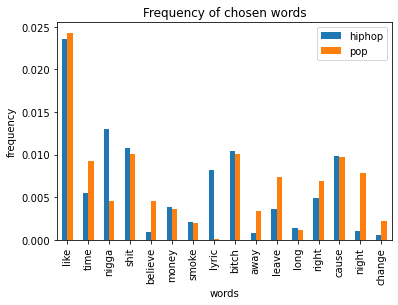

In [83]:
table.plot(kind = 'bar', x = 'word')
plt.title("Frequency of chosen words")
plt.xlabel('words')
plt.ylabel('frequency')

In [84]:
X_train_second = np.array(words_in_texts(words, music_second['lyrics']))
Y_train_second = music_second['genre']

X_train_second[:5], Y_train_second[:5]

(array([[1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
        [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0],
        [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 0    pop
 1    pop
 2    pop
 3    pop
 4    pop
 Name: genre, dtype: object)

In [87]:
second_model = LogisticRegression()
second_model.fit(X_train_second, Y_train_second)

LogisticRegression()

In [96]:
training_accuracy_for_second = np.mean(second_model.predict(X_train_second) == Y_train_second)
training_accuracy_for_second

0.8926014319809069

Got fairly high accuracy. However, can I imporve this accuracy by choosing different words?

In [146]:
words_for_second_model = ['nigga','niggas','lyric','commercial','night','believe','scar','home',
                          'kiss','away','heart','waste', 'yeah']
pop_second['commercial'] = 0

In [147]:
table2 = df_creating_second(words_for_second_model)

Text(0, 0.5, 'frequency')

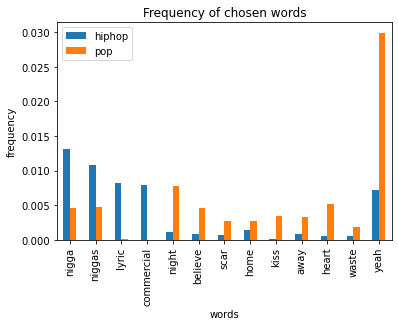

In [148]:
table2.plot(kind = 'bar', x = 'word')
plt.title("Frequency of chosen words")
plt.xlabel('words')
plt.ylabel('frequency')

In [149]:
X_train_second_2 = np.array(words_in_texts(words_for_second_model, music_second['lyrics']))
Y_train_second_2 = music_second['genre']

X_train_second_2[:5], Y_train_second_2[:5]

(array([[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 0    pop
 1    pop
 2    pop
 3    pop
 4    pop
 Name: genre, dtype: object)

In [150]:
second_model_2 = LogisticRegression()
second_model_2.fit(X_train_second_2, Y_train_second_2)

LogisticRegression()

In [153]:
training_accuracy_for_second_2= np.mean(second_model_2.predict(X_train_second_2) == Y_train_second_2)
print("Training Accuracy: ", training_accuracy_for_second_2)

Training Accuracy:  0.9140811455847255


Slight Increase in accuracy!

Applying the models to the test sets

In [154]:
test_matrix_second = words_in_texts(words_for_second_model, test_second['lyrics'])

In [156]:
second_prediction = second_model_2.predict(test_matrix_second)

In [159]:
test_second['second_prediction'] = second_prediction

/tmp/ipykernel_25/396676531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_second['second_prediction'] = second_prediction


In [160]:
test_second

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,second_prediction
60,19881,travis scott,can't say,2018,pop,smokin hella weed alcohol shawty lick clean su...,pop
1094,82323,too $hort,the ghetto,2019,hip hop,talk bout ghetto funky funky ghetto try surviv...,hip hop
186,20245,p!nk,walk me home,2019,pop,somethin roll eye take better time good thing ...,pop
986,82156,mc lyte,i go on,2018,hip hop,flap tongue talk wrong real whack roll play ta...,hip hop
113,20020,meek mill,24/7 (feat. ella mai),2018,pop,tell want yeah tell need yeah night talkin bou...,pop
...,...,...,...,...,...,...,...
968,82127,hazhe,crazy,2018,hip hop,crazy haze medina lyric welcome medina stadium...,pop
1028,82217,lndn drgs,hop out (remix) (feat. curren$y),2018,hip hop,cross bitch like time east hannin time curreny...,hip hop
95,19972,jacquees,you,2018,pop,stunna music high life yeah yeah yeah morning ...,pop
964,82122,nappy roots,headz up,2018,hip hop,head silly head shawty head head shawty head k...,hip hop


In [158]:
test_accuracy_for_second = np.mean(second_prediction == test_second['genre'])
print("Training Accuracy: ", test_accuracy_for_second)

Training Accuracy:  0.9206349206349206


# Conclusion and Future Improvements

Like I predicted in the beginning of this work, the accuracy of the model that distinguishes between hiphop and blues is higher than the model that distinguishes between hiphop and blues. Throughout this project, I realized the reason why this is happening is that the words that are used in hiphop and blues are less similar than the words used in hiphop and pop. As a result, the accuracy of the model was off by 3 percent.<br> <br>Future Improvements: The models are built in a way that accounts frequencies of words. In other words, the accuracy of the model may be dependent on the chosen words. Also, when I built this model, my intention was to replace all words by its stem words, however I was not able to achieved this due to memory capacity of the notebook. By doing so, I expect to create better models.